<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [36]:
import numpy as np
import pandas as pd
import scipy
import csv
from matplotlib import pylab, gridspec, pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

Задание 1
## Простейший kNN
Вам выданы координаты точек и метки классов. Нужно для новой точки предсказать метку класса.

In [131]:
# выгрузите данные в массивы reds и blues из файлов reds.txt и blues.txt
reds = np.genfromtxt("reds.txt", delimiter=',', dtype=None)
blues = np.genfromtxt('blues.txt', delimiter=",", dtype=None)

a = [x for x in range(799)]
red_pairs=[[i,reds[i]] for i in range(799)]
blue_pairs=[[i,blues[i]] for i in range(799)]

Постройте на одном графике точки `reds`и `blues` при помощи `plt.scatter`

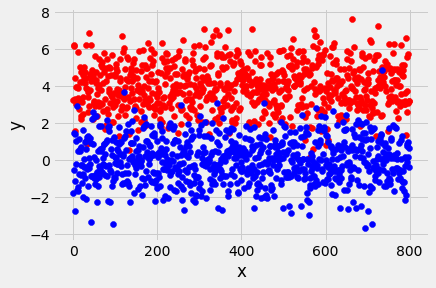

In [132]:
z = list()
t = list()
x = list()
y = list()

for dot in blues:
    z.append(dot[0])
    t.append(dot[1])
for dot in reds:
    x.append(dot[0])
    y.append(dot[1])
plt.scatter(x, y, c=("red"))
plt.scatter(z, t, c=("blue"))
plt.xlabel('x')
plt.ylabel('y')
plt.show()


 Напишем функцию, которая выбирает для заданного **k** и координат точки наиболее подходящий класс по методу k ближайших соседей

In [142]:
def guess_class(x,y,k):
    dotty = (x, y)
    #def draw_points(x,y):
    #    plt.figure(figsize=(5,5))
    #    plt.grid(ls='--')
    #    plt.scatter(a,reds)
    #    plt.scatter(a,blues)
    #    plt.scatter(x,y)
    #    plt.xlim(x-4, x+4)
    #    plt.ylim(y-4, y+4)
    #draw_points(x,y)

    def distance_2d(b,c):
        return(((b[0]-c[0])**2+(b[1]-c[1])**2)**(1/2))

    def calculate_k_distances(class_points):        
        distances = list()
        fin_distances = list()
        for dot in class_points:
            distances.append(distance_2d(dotty, dot))
        distances = sorted(distances)
        fin_distances = distances[:k]
        return(fin_distances)
    
    b = np.array(calculate_k_distances(blues)) 
    # расстояния до ближайших k соседей класса blue
    r = np.array(calculate_k_distances(reds)) 
    # расстояния до ближайших k соседей класса red
    
     # вам необходимо проверить расстояния до ближайших k точек и посмотреть, 
        #какой класс встречается чаще всего. 
    bb = 0
    rr = 0
    for i in range(k):
        for j in range(k):
            if b[i] < r[j]:
                bb += 1
                j -= 1
                break
            elif b[i] > r[j]:
                rr += 1
                i -= 1
                break
            elif b[i] == r[j]:
                bb += 1
                rr += 1
    if bb > rr: print('blue')
    elif rr > bb: print('red')
    else: print('suck')
            

In [147]:
guess_class(200,2,3)

red
